# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
my_path = os.path.abspath('/Users/radhikamehrotra/Documents/DATA1030-Fall2021/DATA1030/Midterm Report')
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# Reading in the Data

In [2]:
df = pd.read_csv('/Users/radhikamehrotra/Documents/DATA1030-Fall2021/DATA1030/Midterm Report/Data/SeoulBikeData.csv', encoding="ISO-8859-1")
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [3]:
#Shuffling around some columns in the dataset to get the Target variable as the last column
df = df[['Date','Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Rented Bike Count']]
df

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,1003
8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,764
8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,694
8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,712


In [4]:
#Transforming string type Date to datetime 
df.Date = pd.to_datetime(df.Date,dayfirst = True)

# EDA 

## Analyzing Rows and Columns

In [5]:
#Shape of datat (number of rows and columns)
print(df.shape)
print(df.columns)

(8760, 14)
Index(['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Rented Bike Count'],
      dtype='object')


In [6]:
#column data types
df.dtypes

Date                         datetime64[ns]
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
Rented Bike Count                     int64
dtype: object

In [5]:
#Determining if the columns are continuous or categorical (using code written in my previous HW)
catcontdict = {}
for i in range(len(df.columns)):   
        count = 0
        for value in (df[df.columns[i]]).value_counts(normalize = True):
            if value < 0.05:
                count += 1
                
        if count > 0.8 * len (df[df.columns[i]].value_counts()) and len (df[df.columns[i]].value_counts()) > 10:
            catcontdict[df.columns[i]] = "Continuous"
        else:
            catcontdict[df.columns[i]] = "Categorical"
            
print(catcontdict) 

{'Date': 'Continuous', 'Hour': 'Continuous', 'Temperature(°C)': 'Continuous', 'Humidity(%)': 'Continuous', 'Wind speed (m/s)': 'Continuous', 'Visibility (10m)': 'Continuous', 'Dew point temperature(°C)': 'Continuous', 'Solar Radiation (MJ/m2)': 'Continuous', 'Rainfall(mm)': 'Continuous', 'Snowfall (cm)': 'Continuous', 'Seasons': 'Categorical', 'Holiday': 'Categorical', 'Functioning Day': 'Categorical', 'Rented Bike Count': 'Continuous'}


## Analyzing Target Variable

In [8]:
#General statistics of target variable 'Y'
df['Rented Bike Count'].value_counts()

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64

In [9]:
df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

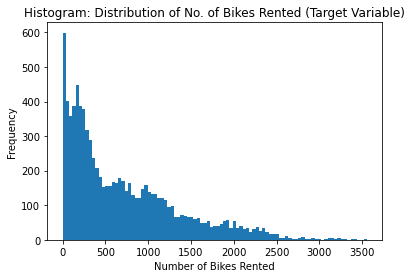

In [7]:
#Plotting histogram for Target variable
fig = plt.figure()
df['Rented Bike Count'].plot.hist(bins = int(np.sqrt(df.shape[0])))
plt.title('Histogram: Distribution of No. of Bikes Rented (Target Variable)')
plt.xlabel('Number of Bikes Rented')
plt.show()
fig.savefig(my_path + '/Figures/fig1.png')

## Analyzing each feature variable

### 1. Date

In [11]:
df["Date"].value_counts().sort_index()

2017-12-01    24
2017-12-02    24
2017-12-03    24
2017-12-04    24
2017-12-05    24
              ..
2018-11-26    24
2018-11-27    24
2018-11-28    24
2018-11-29    24
2018-11-30    24
Name: Date, Length: 365, dtype: int64

In [12]:
df["Date"].describe()

/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_3576/1302155438.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["Date"].describe()


count                    8760
unique                    365
top       2017-12-01 00:00:00
freq                       24
first     2017-12-01 00:00:00
last      2018-11-30 00:00:00
Name: Date, dtype: object

### 2. Hour of the Day

In [13]:
df["Hour"].value_counts().sort_index()

0     365
1     365
2     365
3     365
4     365
5     365
6     365
7     365
8     365
9     365
10    365
11    365
12    365
13    365
14    365
15    365
16    365
17    365
18    365
19    365
20    365
21    365
22    365
23    365
Name: Hour, dtype: int64

### 3. Temperature in degree celsius

In [14]:
df["Temperature(°C)"].value_counts().sort_index()

-17.8    1
-17.5    2
-17.4    1
-16.9    1
-16.5    1
        ..
 38.0    1
 38.7    1
 39.0    1
 39.3    1
 39.4    1
Name: Temperature(°C), Length: 546, dtype: int64

In [15]:
df["Temperature(°C)"].describe()

count    8760.000000
mean       12.882922
std        11.944825
min       -17.800000
25%         3.500000
50%        13.700000
75%        22.500000
max        39.400000
Name: Temperature(°C), dtype: float64

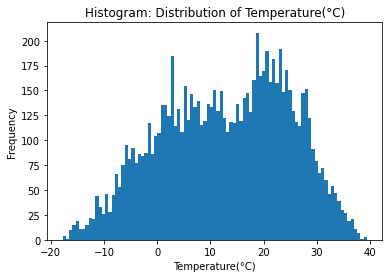

In [16]:
#Plotting histogram for Temperature
fig = plt.figure()
df['Temperature(°C)'].plot.hist(bins = int(np.sqrt(df.shape[0])))
#df['Temperature(°C)'].plot.hist(bins  = df['Temperature(°C)'].nunique())                       
plt.title('Histogram: Distribution of Temperature(°C)')
plt.xlabel('Temperature(°C)')
plt.show()
fig.savefig(my_path + '/Figures/fig2.png')

### 4. Humidity (%)

In [17]:
df["Humidity(%)"].value_counts().sort_index()

0      17
10      1
11      1
12      1
13      3
     ... 
94     54
95     68
96    111
97    173
98     50
Name: Humidity(%), Length: 90, dtype: int64

In [18]:
df["Humidity(%)"].describe()

count    8760.000000
mean       58.226256
std        20.362413
min         0.000000
25%        42.000000
50%        57.000000
75%        74.000000
max        98.000000
Name: Humidity(%), dtype: float64

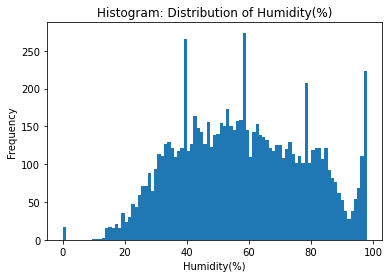

In [19]:
#Plotting histogram for Humidity
fig = plt.figure()
df['Humidity(%)'].plot.hist(bins = int(np.sqrt(df.shape[0])))
#df['Temperature(°C)'].plot.hist(bins  = df['Temperature(°C)'].nunique())                       
plt.title('Histogram: Distribution of Humidity(%)')
plt.xlabel('Humidity(%)')
plt.show()
fig.savefig(my_path + '/Figures/fig3.png')

### 5. Wind speed (m/s)

In [20]:
df["Wind speed (m/s)"].value_counts().sort_index()

0.0     74
0.1     49
0.2     86
0.3    158
0.4    186
      ... 
6.7      1
6.9      1
7.2      1
7.3      1
7.4      1
Name: Wind speed (m/s), Length: 65, dtype: int64

In [21]:
df["Wind speed (m/s)"].describe()

count    8760.000000
mean        1.724909
std         1.036300
min         0.000000
25%         0.900000
50%         1.500000
75%         2.300000
max         7.400000
Name: Wind speed (m/s), dtype: float64

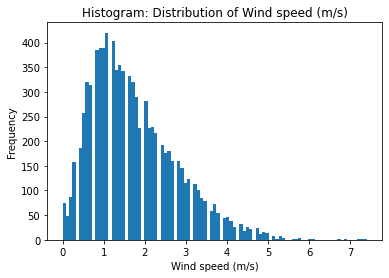

In [22]:
#Plotting histogram for Wind Speed
fig = plt.figure()
df['Wind speed (m/s)'].plot.hist(bins = int(np.sqrt(df.shape[0])))
#df['Temperature(°C)'].plot.hist(bins  = df['Temperature(°C)'].nunique())                       
plt.title('Histogram: Distribution of Wind speed (m/s)')
plt.xlabel('Wind speed (m/s)')
plt.show()
fig.savefig(my_path + '/Figures/fig4.png')

### 6. Visibility (10m)

In [23]:
df["Visibility (10m)"].value_counts().sort_index()

27         1
33         1
34         1
38         1
53         1
        ... 
1996      27
1997      22
1998      25
1999      28
2000    2245
Name: Visibility (10m), Length: 1789, dtype: int64

In [24]:
df["Visibility (10m)"].describe()

count    8760.000000
mean     1436.825799
std       608.298712
min        27.000000
25%       940.000000
50%      1698.000000
75%      2000.000000
max      2000.000000
Name: Visibility (10m), dtype: float64

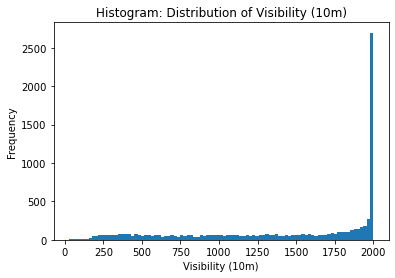

In [25]:
#Plotting histogram for Visibility (10m)
fig = plt.figure()
df['Visibility (10m)'].plot.hist(bins = int(np.sqrt(df.shape[0])))
#df['Temperature(°C)'].plot.hist(bins  = df['Temperature(°C)'].nunique())                       
plt.title('Histogram: Distribution of Visibility (10m)')
plt.xlabel('Visibility (10m)')
plt.show()
fig.savefig(my_path + '/Figures/fig5.png')

### 7. Dew Point Temperature in degree celsius

In [26]:
df["Dew point temperature(°C)"].value_counts().sort_index()

-30.6    1
-30.5    1
-29.8    1
-29.7    1
-29.6    2
        ..
 26.1    3
 26.3    1
 26.6    1
 26.8    2
 27.2    1
Name: Dew point temperature(°C), Length: 556, dtype: int64

In [27]:
df["Dew point temperature(°C)"].describe()

count    8760.000000
mean        4.073813
std        13.060369
min       -30.600000
25%        -4.700000
50%         5.100000
75%        14.800000
max        27.200000
Name: Dew point temperature(°C), dtype: float64

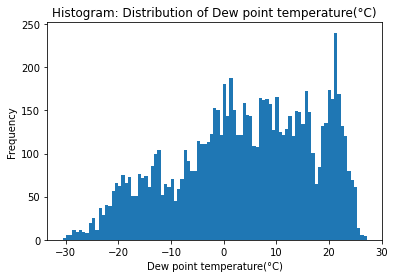

In [28]:
#Plotting histogram for Dew point temperature(°C)
fig = plt.figure()
df['Dew point temperature(°C)'].plot.hist(bins = int(np.sqrt(df.shape[0])))
#df['Dew point temperature(°C)'].plot.hist(bins  = df['Dew point temperature(°C)'].nunique())                       
plt.title('Histogram: Distribution of Dew point temperature(°C)')
plt.xlabel('Dew point temperature(°C)')
plt.show()
fig.savefig(my_path + '/Figures/fig6.png')

### 8. Solar Radiation

In [29]:
df["Solar Radiation (MJ/m2)"].value_counts().sort_index()

0.00    4300
0.01     128
0.02      82
0.03      69
0.04      47
        ... 
3.42       4
3.44       1
3.45       1
3.49       1
3.52       2
Name: Solar Radiation (MJ/m2), Length: 345, dtype: int64

In [30]:
df["Solar Radiation (MJ/m2)"].describe()

count    8760.000000
mean        0.569111
std         0.868746
min         0.000000
25%         0.000000
50%         0.010000
75%         0.930000
max         3.520000
Name: Solar Radiation (MJ/m2), dtype: float64

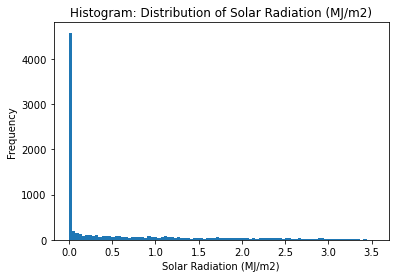

In [31]:
#Plotting histogram for Solar Radiation (MJ/m2)
df['Solar Radiation (MJ/m2)'].plot.hist(bins = int(np.sqrt(df.shape[0])))
#df['Solar Radiation (MJ/m2)'].plot.hist(bins  = df['Solar Radiation (MJ/m2)'].nunique())                       
plt.title('Histogram: Distribution of Solar Radiation (MJ/m2)')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.show()
fig.savefig(my_path + '/Figures/fig7.png')

### 9. Rainfall

In [32]:
df["Rainfall(mm)"].value_counts().sort_index()

0.0     8232
0.1       46
0.2       20
0.3        9
0.4       16
        ... 
21.0       1
21.5       1
24.0       1
29.5       1
35.0       1
Name: Rainfall(mm), Length: 61, dtype: int64

In [33]:
df["Rainfall(mm)"].describe()

count    8760.000000
mean        0.148687
std         1.128193
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: Rainfall(mm), dtype: float64

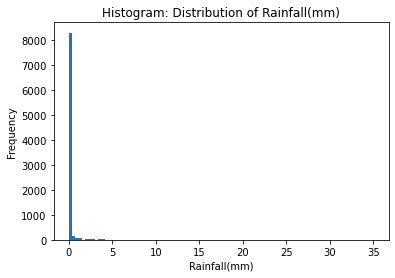

In [34]:
#Plotting histogram for Rainfall(mm)
df['Rainfall(mm)'].plot.hist(bins = int(np.sqrt(df.shape[0])))                    
plt.title('Histogram: Distribution of Rainfall(mm)')
plt.xlabel('Rainfall(mm)')
plt.show()
fig.savefig(my_path + '/Figures/fig8.png')

### 10. Snowfall

In [35]:
df["Snowfall (cm)"].value_counts()

0.0    8317
0.3      42
1.0      39
0.9      34
0.5      34
0.7      31
0.8      22
2.0      22
0.4      21
1.6      19
2.2      18
0.2      15
0.6      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
4.0       4
4.1       4
3.2       4
1.3       4
3.7       3
3.3       3
1.1       3
3.8       3
2.3       3
2.1       3
1.9       3
1.7       3
2.4       3
3.4       2
8.8       2
2.8       2
2.9       2
0.1       2
5.0       2
4.8       2
1.4       2
3.9       2
4.3       2
5.1       1
1.5       1
3.1       1
7.1       1
7.0       1
6.0       1
3.6       1
4.2       1
Name: Snowfall (cm), dtype: int64

In [36]:
df["Snowfall (cm)"].describe()

count    8760.000000
mean        0.075068
std         0.436746
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.800000
Name: Snowfall (cm), dtype: float64

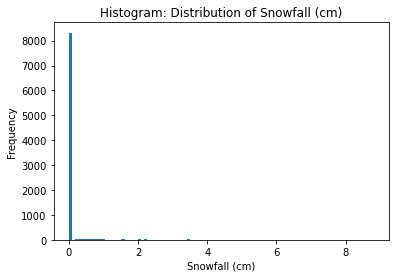

In [37]:
#Plotting histogram forSnowfall (cm)
df['Snowfall (cm)'].plot.hist(bins = int(np.sqrt(df.shape[0])))                     
plt.title('Histogram: Distribution of Snowfall (cm)')
plt.xlabel('Snowfall (cm)')
plt.show()
fig.savefig(my_path + '/Figures/fig9.png')

### 11. Seasons 

In [38]:
df["Seasons"].value_counts().sort_index()

Autumn    2184
Spring    2208
Summer    2208
Winter    2160
Name: Seasons, dtype: int64

In [39]:
df["Seasons"].describe()

count       8760
unique         4
top       Spring
freq        2208
Name: Seasons, dtype: object

### 12. Holiday

In [40]:
df["Holiday"].value_counts().sort_index()

Holiday        432
No Holiday    8328
Name: Holiday, dtype: int64

In [41]:
df["Holiday"].describe()

count           8760
unique             2
top       No Holiday
freq            8328
Name: Holiday, dtype: object

### 13. Functioning Day

In [42]:
df["Functioning Day"].value_counts().sort_index()

No      295
Yes    8465
Name: Functioning Day, dtype: int64

In [43]:
df["Functioning Day"].describe()

count     8760
unique       2
top        Yes
freq      8465
Name: Functioning Day, dtype: object

## Scatter Matrix

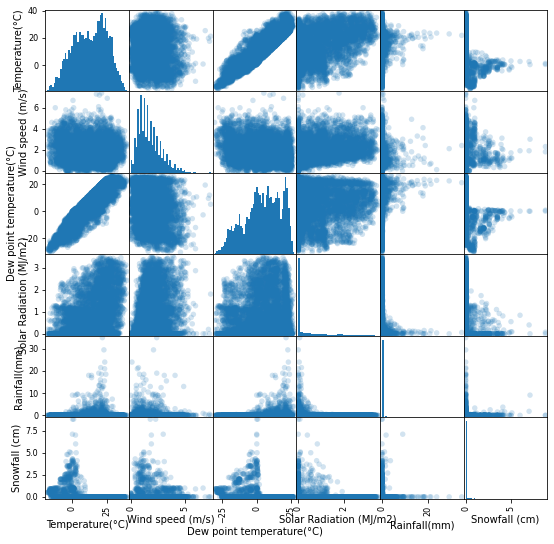

In [44]:
#Plotting all the possible combinations of the features against eachother for EDA
pd.plotting.scatter_matrix(df.select_dtypes(float), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.2)
plt.show()
fig.savefig(my_path + '/Figures/fig10.png')

## Analyzing different relationships between target variable and features

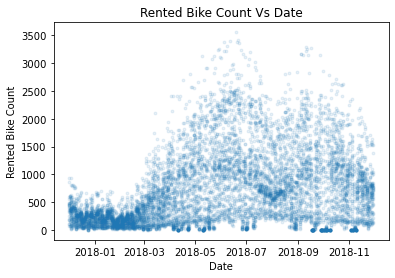

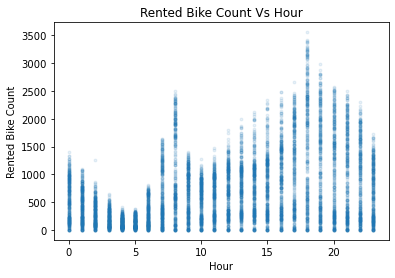

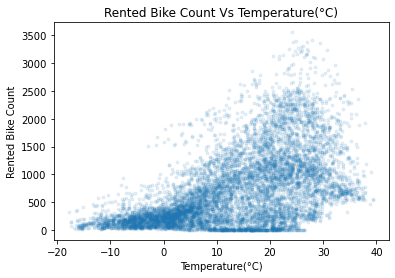

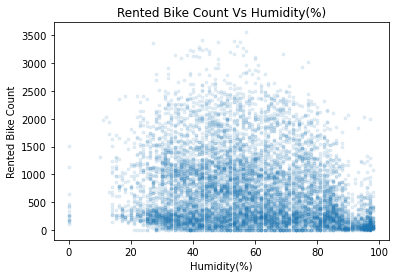

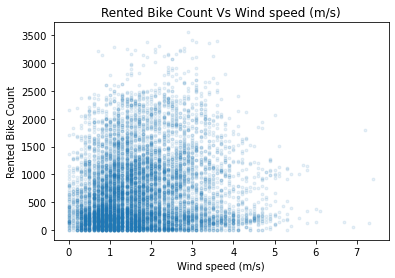

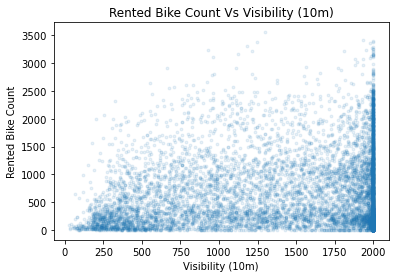

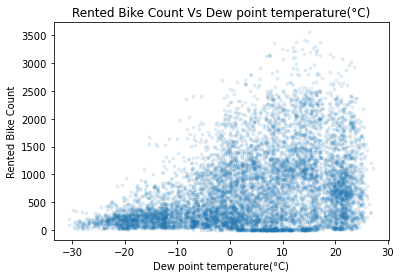

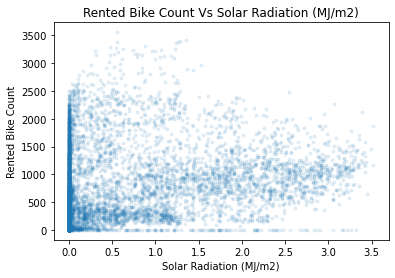

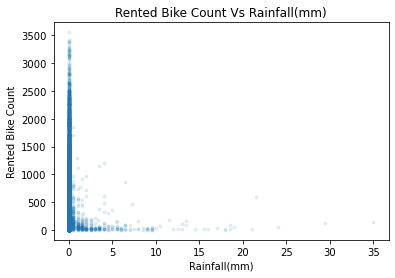

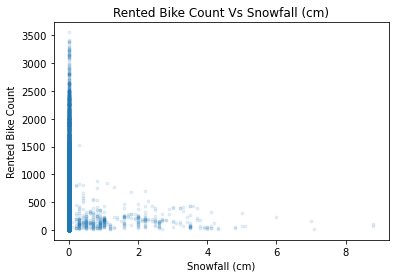

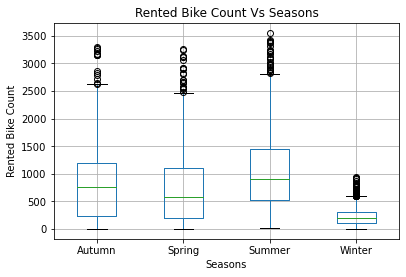

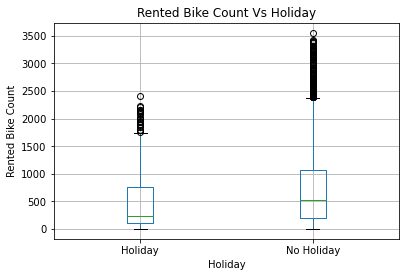

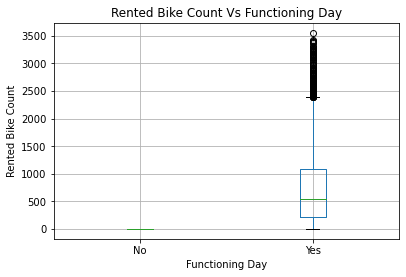

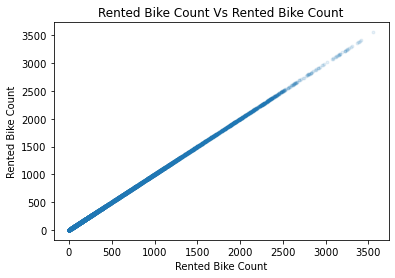

In [8]:
for i in range(len(df.columns)):
    if catcontdict[df.columns[i]] == 'Categorical':
        df[[df.columns[i], 'Rented Bike Count']].boxplot(by= df.columns[i])
        plt.title("Rented Bike Count Vs "+ str(df.columns[i]))
        plt.suptitle("")
        plt.xlabel(df.columns[i])
        plt.ylabel("Rented Bike Count")
        plt.show()
        fig.savefig(my_path + '/Figures/'+ df.columns[i]+'.png')
        
    else:
        df.plot.scatter(df.columns[i],'Rented Bike Count', s=8, alpha = 0.1)
        plt.xlabel(df.columns[i])
        plt.ylabel("Rented Bike Count")
        plt.title("Rented Bike Count Vs " + str(df.columns[i]))
        plt.show()
        fig.savefig(my_path + '/Figures/'+ df.columns[i].replace('/','-')+'.png')

### Grouping Data by the date to get data at day level

In [46]:
df2 = df.groupby('Date', as_index = False).mean()
df2

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,2017-12-01,11.5,-2.454167,45.875000,1.537500,1870.750000,-13.545833,0.248750,0.000000,0.000000,397.458333
1,2017-12-02,11.5,1.325000,61.958333,1.712500,1471.083333,-5.716667,0.263750,0.000000,0.000000,355.125000
2,2017-12-03,11.5,4.875000,81.541667,1.612500,455.750000,1.883333,0.125417,0.166667,0.000000,300.916667
3,2017-12-04,11.5,-0.304167,52.500000,3.450000,1362.833333,-9.925000,0.282917,0.004167,0.000000,363.708333
4,2017-12-05,11.5,-4.458333,36.416667,1.108333,1959.458333,-17.425000,0.035833,0.000000,0.000000,346.125000
...,...,...,...,...,...,...,...,...,...,...,...
360,2018-11-26,11.5,6.320833,70.500000,1.029167,475.000000,0.845833,0.418750,0.000000,0.120833,715.083333
361,2018-11-27,11.5,7.066667,68.000000,1.350000,405.291667,1.000000,0.192500,0.000000,0.000000,678.416667
362,2018-11-28,11.5,5.304167,25.791667,1.695833,1429.083333,-13.350000,0.403333,0.000000,0.000000,688.500000
363,2018-11-29,11.5,3.304167,38.000000,1.212500,1596.708333,-9.808333,0.117083,0.000000,0.000000,684.291667


In [47]:
df2['Seasons'] =''
df2['Holiday'] =''
df2['Functioning Day'] = ''
for i in range(len(df2['Date'])):
    for j in range(len(df['Date'])):
        if df['Date'][j] == df2['Date'][i]:
            df2['Seasons'][i] = df['Seasons'][j]
            df2['Holiday'][i] = df['Holiday'][j]
            df2['Functioning Day'][i] = df['Functioning Day'][j]
      

/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_3576/1475652537.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Seasons'][i] = df['Seasons'][j]
/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_3576/1475652537.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Holiday'][i] = df['Holiday'][j]
/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_3576/1475652537.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [48]:
df2 = df2[['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','Seasons', 'Holiday', 'Functioning Day',
       'Rented Bike Count']]
df2

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,2017-12-01,11.5,-2.454167,45.875000,1.537500,1870.750000,-13.545833,0.248750,0.000000,0.000000,Winter,No Holiday,Yes,397.458333
1,2017-12-02,11.5,1.325000,61.958333,1.712500,1471.083333,-5.716667,0.263750,0.000000,0.000000,Winter,No Holiday,Yes,355.125000
2,2017-12-03,11.5,4.875000,81.541667,1.612500,455.750000,1.883333,0.125417,0.166667,0.000000,Winter,No Holiday,Yes,300.916667
3,2017-12-04,11.5,-0.304167,52.500000,3.450000,1362.833333,-9.925000,0.282917,0.004167,0.000000,Winter,No Holiday,Yes,363.708333
4,2017-12-05,11.5,-4.458333,36.416667,1.108333,1959.458333,-17.425000,0.035833,0.000000,0.000000,Winter,No Holiday,Yes,346.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-11-26,11.5,6.320833,70.500000,1.029167,475.000000,0.845833,0.418750,0.000000,0.120833,Autumn,No Holiday,Yes,715.083333
361,2018-11-27,11.5,7.066667,68.000000,1.350000,405.291667,1.000000,0.192500,0.000000,0.000000,Autumn,No Holiday,Yes,678.416667
362,2018-11-28,11.5,5.304167,25.791667,1.695833,1429.083333,-13.350000,0.403333,0.000000,0.000000,Autumn,No Holiday,Yes,688.500000
363,2018-11-29,11.5,3.304167,38.000000,1.212500,1596.708333,-9.808333,0.117083,0.000000,0.000000,Autumn,No Holiday,Yes,684.291667


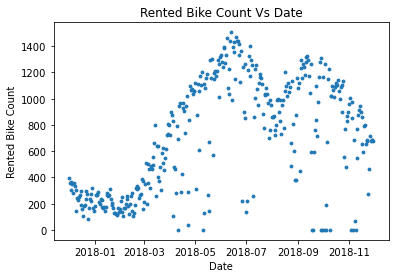

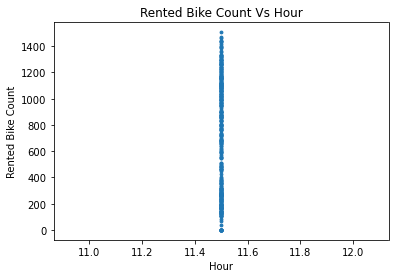

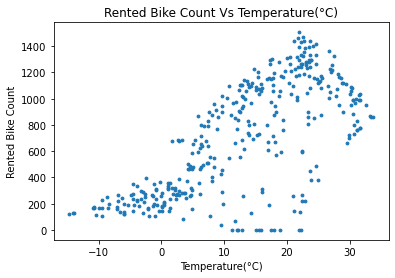

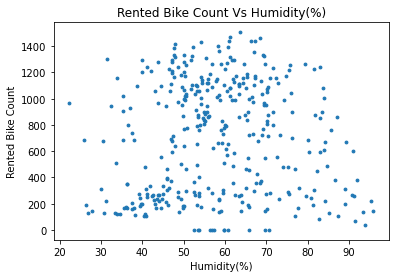

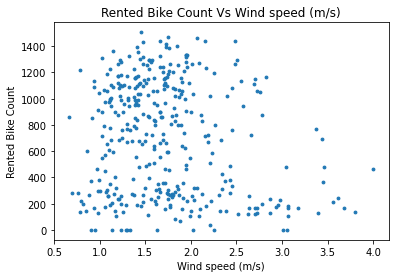

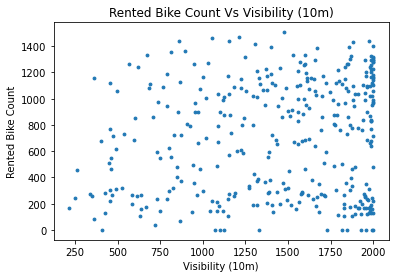

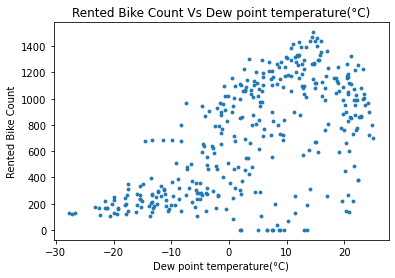

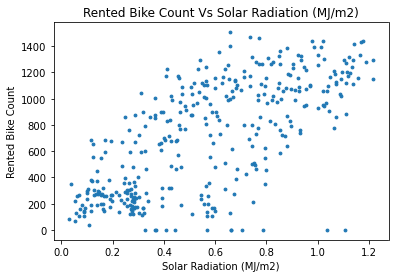

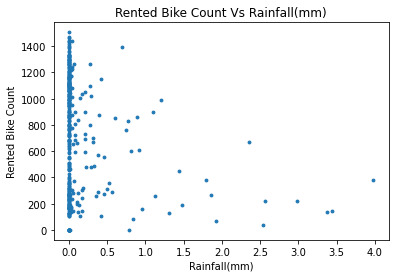

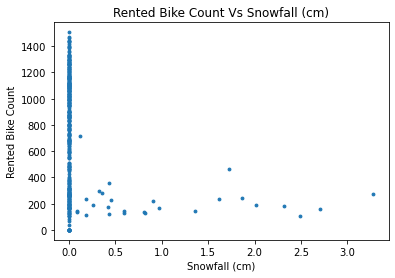

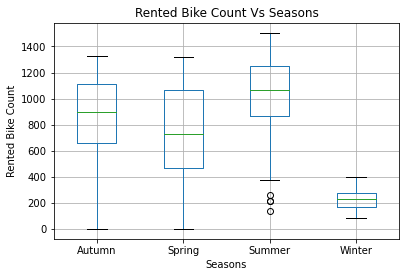

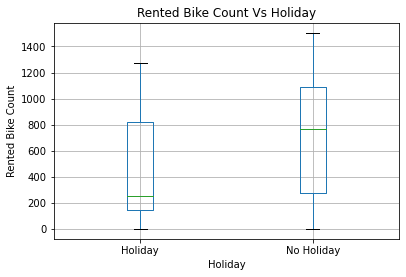

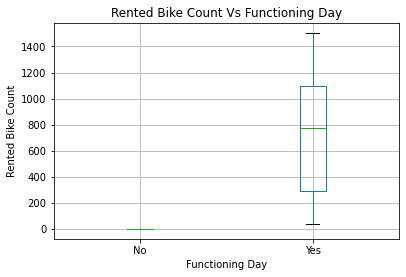

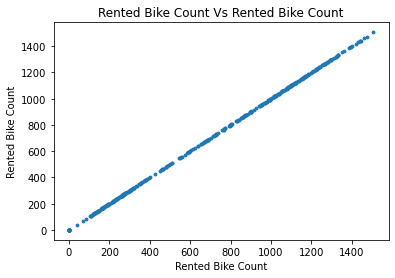

In [50]:
for i in range(len(df2.columns)):
    if catcontdict[df2.columns[i]] == 'Categorical':
        df2[[df2.columns[i], 'Rented Bike Count']].boxplot(by= df2.columns[i])
        plt.title("Rented Bike Count Vs "+ str(df2.columns[i]))
        plt.suptitle("")
        plt.xlabel(df2.columns[i])
        plt.ylabel("Rented Bike Count")
        plt.show()
        fig.savefig(my_path + '/Figures/'+ df.columns[i]+'2.png')
        
    else:
        df2.plot.scatter(df2.columns[i],'Rented Bike Count', s=8)
        plt.xlabel(df2.columns[i])
        plt.ylabel("Rented Bike Count")
        plt.title("Rented Bike Count Vs " + str(df.columns[i]))
        plt.show()
        fig.savefig(my_path + '/Figures/'+ df.columns[i].replace('/','-')+'.png')

### Grouping Data by month to get data at monthly level

In [51]:
df3 = df2
df3['Year'] = df2['Date'].dt.year
df3['Month'] = df2['Date'].dt.month
df3 = df3[['Date',  'Year', 'Month','Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Rented Bike Count']]

/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_3576/3304891761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Year'] = df2['Date'].dt.year
/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_3576/3304891761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Month'] = df2['Date'].dt.month


In [52]:
df_month = df3.groupby('Month', as_index = False).mean()
df_month

,Month,Year,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,1,2018.0,11.5,-3.943145,48.081989,1.872581,1459.887097,-13.913844,0.226747,0.011425,0.255376,201.620968
1,2,2018.0,11.5,-1.664732,44.854167,2.182887,1556.528274,-13.053274,0.481667,0.041071,0.102083,225.941964
2,3,2018.0,11.5,8.044489,59.295699,1.921774,1143.004032,-0.270699,0.600013,0.069220,0.000000,511.551075
3,4,2018.0,11.5,12.948056,54.611111,1.985972,1327.868056,2.520556,0.712764,0.180972,0.000000,728.093056
4,5,2018.0,11.5,18.144355,62.288978,1.719624,1253.044355,10.058737,0.754355,0.298387,0.000000,950.387097
5,6,2018.0,11.5,23.136806,62.618056,1.675833,1244.911111,14.775972,0.836931,0.238194,0.000000,1245.676389
6,7,2018.0,11.5,27.763978,67.447581,1.454167,1538.481183,20.576478,0.754167,0.249462,0.000000,987.177419
7,8,2018.0,11.5,28.736425,64.802419,1.700403,1713.559140,20.769758,0.695108,0.272312,0.000000,876.192204
8,9,2018.0,11.5,21.498750,60.700000,1.554028,1816.797222,12.908194,0.654111,0.095139,0.000000,935.572222
9,10,2018.0,11.5,13.089113,59.258065,1.543414,1674.366935,4.553091,0.542124,0.161962,0.000000,874.563172


In [53]:
df_month['Month Name'] = ''
for i in range(len(df_month['Month'])):
    if df_month['Month'][i] == 1:
        df_month['Month Name'][i] = 'Jan'
    
    if df_month['Month'][i] == 2:
        df_month['Month Name'][i] = 'Feb'
        
    if df_month['Month'][i] == 3:
        df_month['Month Name'][i] = 'Mar'
        
    if df_month['Month'][i] == 4:
        df_month['Month Name'][i] = 'Apr'
        
    if df_month['Month'][i] == 5:
        df_month['Month Name'][i] = 'May'
        
    if df_month['Month'][i] == 6:
        df_month['Month Name'][i] = 'Jun'
        
    if df_month['Month'][i] == 7:
        df_month['Month Name'][i] = 'Jul'
        
    if df_month['Month'][i] == 8:
        df_month['Month Name'][i] = 'Aug'
        
    if df_month['Month'][i] == 9:
        df_month['Month Name'][i] = 'Sep'
        
    if df_month['Month'][i] == 10:
        df_month['Month Name'][i] = 'Oct'
        
    if df_month['Month'][i] == 11:
        df_month['Month Name'][i] = 'Nov'
        
    if df_month['Month'][i] == 12:
        df_month['Month Name'][i] = 'Dec'
              
df_month

/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_3576/453134198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['Month Name'][i] = 'Jan'
/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_3576/453134198.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['Month Name'][i] = 'Feb'
/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_3576/453134198.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,Month,Year,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count,Month Name
0,1,2018.0,11.5,-3.943145,48.081989,1.872581,1459.887097,-13.913844,0.226747,0.011425,0.255376,201.620968,Jan
1,2,2018.0,11.5,-1.664732,44.854167,2.182887,1556.528274,-13.053274,0.481667,0.041071,0.102083,225.941964,Feb
2,3,2018.0,11.5,8.044489,59.295699,1.921774,1143.004032,-0.270699,0.600013,0.069220,0.000000,511.551075,Mar
3,4,2018.0,11.5,12.948056,54.611111,1.985972,1327.868056,2.520556,0.712764,0.180972,0.000000,728.093056,Apr
4,5,2018.0,11.5,18.144355,62.288978,1.719624,1253.044355,10.058737,0.754355,0.298387,0.000000,950.387097,May
5,6,2018.0,11.5,23.136806,62.618056,1.675833,1244.911111,14.775972,0.836931,0.238194,0.000000,1245.676389,Jun
6,7,2018.0,11.5,27.763978,67.447581,1.454167,1538.481183,20.576478,0.754167,0.249462,0.000000,987.177419,Jul
7,8,2018.0,11.5,28.736425,64.802419,1.700403,1713.559140,20.769758,0.695108,0.272312,0.000000,876.192204,Aug
8,9,2018.0,11.5,21.498750,60.700000,1.554028,1816.797222,12.908194,0.654111,0.095139,0.000000,935.572222,Sep
9,10,2018.0,11.5,13.089113,59.258065,1.543414,1674.366935,4.553091,0.542124,0.161962,0.000000,874.563172,Oct


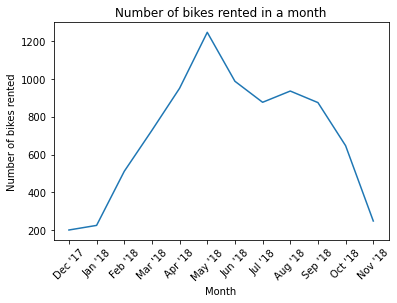

In [54]:
plt.plot(df_month['Month Name'],df_month['Rented Bike Count'])
positions = (0,1,2,3,4,5,6,7,8,9,10,11)
labels = ["Dec '17", "Jan '18", "Feb '18", "Mar '18", "Apr '18", "May '18", "Jun '18", 
          "Jul '18", "Aug '18", "Sep '18", "Oct '18", "Nov '18"]
plt.title('Number of bikes rented in a month')
plt.xlabel('Month')
plt.xticks(positions, labels, rotation = 45)
plt.ylabel('Number of bikes rented')
plt.show()
fig.savefig(my_path + '/Figures/fig11.png')

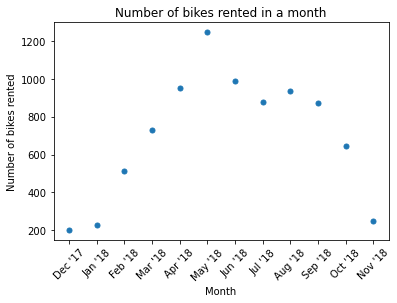

In [55]:
df_month.plot.scatter('Month Name', 'Rented Bike Count', s=25)
positions = (0,1,2,3,4,5,6,7,8,9,10,11)
labels = ["Dec '17", "Jan '18", "Feb '18", "Mar '18", "Apr '18", "May '18", "Jun '18", 
          "Jul '18", "Aug '18", "Sep '18", "Oct '18", "Nov '18"]
plt.title('Number of bikes rented in a month')
plt.xlabel('Month')
plt.xticks(positions, labels, rotation = 45)
plt.ylabel('Number of bikes rented')
plt.show()
fig.savefig(my_path + '/Figures/fig12.png')

# Data Splitting

In [56]:
X = df.iloc[: , 0:13]
y = df.iloc[: , 13:14]

In [57]:
from sklearn.model_selection import train_test_split 
random_state = 13
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.8,random_state=random_state)
print('training set:',X_train.shape, y_train.shape) 
print(X_other.shape, y_other.shape) 

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)
print('validation set:',X_val.shape, y_val.shape) 
print('test set:',X_test.shape, y_test.shape) 




training set: (7008, 13) (7008, 1)
(1752, 13) (1752, 1)
validation set: (876, 13) (876, 1)
test set: (876, 13) (876, 1)


 # Data Preprocessing

## Preprocessing the Categorical columns and the Continuous Columns

### Using One Hot Encoder (Categorical, unordered)

In [58]:
#Preprocessing Categorical Data (columns "Seasons", "Holiday", "Functioning Day")
#let's collect all categorical features first
onehot_ftrs = ["Seasons", "Holiday", "Functioning Day"]
#initialize the encoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore') 
#fit the training data
enc.fit(X_train[onehot_ftrs])
print('categories:',enc.categories_)
print('feature names:',enc.get_feature_names(onehot_ftrs))
print(len(enc.get_feature_names(onehot_ftrs)))

X_train_ohe = enc.transform(X_train[onehot_ftrs])
print('X_train transformed')
print(X_train_ohe)

X_test_ohe = enc.transform(X_test[onehot_ftrs])
print('X_test transformed')
print(X_test_ohe)

categories: [array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object), array(['Holiday', 'No Holiday'], dtype=object), array(['No', 'Yes'], dtype=object)]
feature names: ['Seasons_Autumn' 'Seasons_Spring' 'Seasons_Summer' 'Seasons_Winter'
 'Holiday_Holiday' 'Holiday_No Holiday' 'Functioning Day_No'
 'Functioning Day_Yes']
8
X_train transformed
[[0. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 ...
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]]
X_test transformed
[[0. 1. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 ...
 [0. 0. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 1.]]


## Using Standard Scalar for continuous data

In [59]:
std_ftrs = ['Hour','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
scaler = StandardScaler()
print(scaler.fit_transform(X_train[std_ftrs]))
print(scaler.transform(X_val[std_ftrs]))
print(scaler.transform(X_test[std_ftrs]))

[[-0.5101178  -1.11527963  0.97778283 ... -0.65878351 -0.12614458
  -0.16793832]
 [-1.08914365  0.98927994  1.37089857 ... -0.65878351 -0.12614458
  -0.16793832]
 [ 1.22695973  0.79566046 -0.39812224 ... -0.60147424 -0.12614458
  -0.16793832]
 ...
 [ 0.64793389  0.43367621 -1.57746944 ...  1.00318543 -0.12614458
  -0.16793832]
 [-1.37865657 -0.71120419  1.42003804 ... -0.65878351 -0.12614458
  -0.16793832]
 [-1.37865657 -1.65404688 -0.0050065  ... -0.65878351 -0.12614458
  -0.16793832]]
[[ 1.37171619 -0.18927342  0.5846671  ... -0.65878351 -0.12614458
  -0.16793832]
 [ 0.35842096 -0.45865704 -0.10328544 ...  0.53324938 -0.12614458
  -0.16793832]
 [-1.08914365 -1.1742073   1.22348017 ... -0.65878351 -0.12614458
  -0.16793832]
 ...
 [ 1.08220327  1.05662584 -0.1524249  ... -0.48685569 -0.12614458
  -0.16793832]
 [-0.5101178   1.4438648  -0.10328544 ... -0.03984336 -0.12614458
  -0.16793832]
 [-1.37865657  0.83775165 -0.39812224 ... -0.65878351 -0.12614458
  -0.16793832]]
[[ 0.2136645  -0